# Convolutions with numpy 

### How do computers see an image

In [ ]:
####

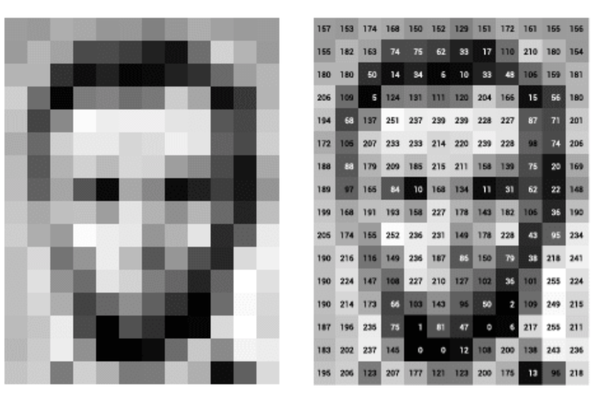

In [1]:
from IPython.display import Image
Image("data/comp.png")

Yuxarıda qeyd olunan rəsm,kompyuter tərəfindən qeydə alınan matriks görünüşüdür.Rəsm gray- yəni boz rəng tonu ilə qeyd olunub.Halbuki rəsmlər sensorlara 3 rəng şkalasında daxil olur.RGB - yəni red green blue.və bu kanalların dəyəri 0-dan 256-a qədər rəng tonunu ifadə edir.0-a yaxın qara ,255-ə doğru isə rəng tonunun ağa doğru dəyişdiyini görə bilərsiniz.Bu diapazon,3 rəng kanalına malik hər bir piksel dəyərinə aiddir.

Shown picture is the matrix vision registere by computer. Picture assigned as gray. But pictures recevied by sensors in 3 color version as RGB - which means Red, Green, Blue. RGB color pictures channel has values from 0 to 256. You can see that values close to 0 is black and values up to 255 is close to white. This range relating to any pixel value which has 3 color channel

Rəsmləri oxumaq üçün müxtəlif kitabxanalar mövcuddur.(Opencv) (skimage) (pyplot) (Pİllow)

There are many libraries to read pictures. (Opencv) (skimage) (pyplot) (Pİllow)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io,data,color
from skimage.transform import rescale, resize, downscale_local_mean

Yuxarıdakı kitabxanalar ilkin hazırlıq mərhələsidir.

Above mentioned libraries are for the first preparation level

In [3]:
def load_image(image):
    """
    Reading image with skimage library
    io.imread(filename)

    """
    image = io.imread(image)
    image = resize(image,(512,512))
    image = np.array(image)
    image = image[:,:,0]
    print('Image shape:',image.shape)
    return image

Yuxarıdakı funksiya vasitəsilə rəsmi oxuyuruq.
Daha sonra,rəsmin ölçüsünü dəyişirik(eni,uzunluğu) (512,512) .Ölçüsü dəyişdirilmiş rəsmin rəngini dəyişirik.

Reading the picture with the above mentioned function.Then, changing the size of the picture(width, lenght) (512,512). Changing the color of the size changed picture

Aşağıdakı funksiya vasitəsilə isə əsas rəsmin ölçüsünü dəyişirik, rəng kanalına toxunmadan oxuyuruq

And with the function below we are changing size of the picture without the color channel changes

In [4]:
def original(rgb):
    rgb = io.imread(rgb)
    rgb = resize(rgb, (512, 512))
    rgb = np.array(rgb)
    print('Image shape:', rgb.shape)
    return rgb

Və hazırladığımız iki funksiya vasitəsilə rəsmləri çağıra bilərik.Ekranda göstərmək üçün matplotlib kitabxanasından istifadə edək

And with the written two functions we can call pictures. To show them on the screen let's use the matplotlib library

Image shape: (512, 512, 3)
Image shape: (512, 512)


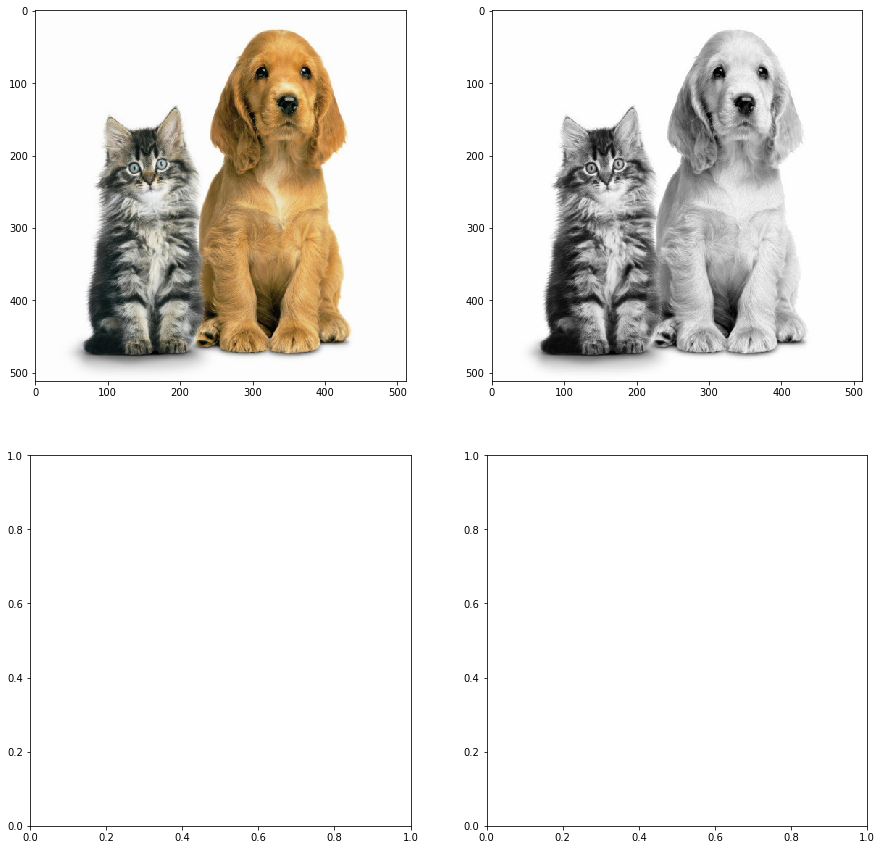

In [22]:

f, axarr = plt.subplots(2,2,figsize=(15,15))
axarr[0,0].imshow(original('data/catdog.jpg'))
axarr[0,1].imshow(load_image('data/catdog.jpg'),cmap='gray')


In [31]:
image_pad = np.pad(load_image('data/catdog.jpg'), (2,2), mode='constant', constant_values=0)

Image shape: (512, 512)


Yuxarıda numpy kitabxanası vasitəsilə matriksə padding əlavə edirik.padding rəsmin kənarlarını 0 - ilə doldurur(verdiyiniz arqumentə uyğun olaraq).size=(2,2) sütun və sətir boyu əlavə olunan 0-dəyəridir.padding əlavə etdiyimizdən rəsmin ölçüsü dəyişəcək

Above, add the padding to matrix with the numpy library.

(516, 516)


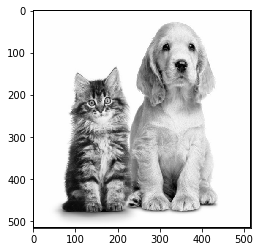

In [32]:
plt.imshow(image_pad,cmap='gray')
print(image_pad.shape) # ölçünün dəyişdiyini görürük

Növbəti kodlarımız isə filterlərin təyin olunmasıdır.Bu ifadəyə həmçinin kernel adı da verilir.

Next codes are for the assigning filters. It's called kernel

In [33]:
kernel_1 = np.array([[1, 0, -1], [0, 0, 0], [-1, 0, 1]])
kernel_2 = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
kernel_3 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

filterləri təyin edirik.filterlər haqqında bu məqalədən ətraflı öyrənə bilərsiniz.Misal olaraq sobelx sobely filterini söyləmək olar
https://docs.opencv.org/2.4/doc/tutorials/imgproc/imgtrans/sobel_derivatives/sobel_derivatives.html

setting filters. You can get detailed information about filters in this article. For example, sobelx sobely filter.

filterləri tətbiq etmək üçün ilkin matriksin sətir sayı ilə kernelin(filterin) sütun sayı eyni olmalıdır.Əks halda digər metodlardan istifadə olunur.Əldə etdiyimiz rəsm üzərinə filter tətbiq etmək üçün bir neçə metod mövcuddur.Misal olaraq Opencv kitabxanası ilə bunu ifadə etsək, cv2.filter2D(src,ddepth,kernel) kimi yazacağıq.Əldə etdiyimiz rəsmlər rəqəmlərdən təşkil olunduğu üçün üzərində riyazi hesablamalar mümkündür.Və bu bəhsdə hazır filter tətbiqetmə funksiyalarından deyil,birbaşa numpy kitabxanasından istifadə edərək rəsm üzərinə filterləri tətbiq edəcəyik.İstənilən halda digər metodlardan da istifadə edə bilərsiniz.

To apply filters need to have an equal raw line numbers of initial matrix with the kernels(filters) column numbers, 
   otherwise using other methods. There are several methods to apply filter on a picture obtined. For example, To apply opencv library we should type cv2.filter2D(src,ddepth,kernel).
   As we know, gained pictures are consist numbers, then it's possible to make math calculations on pics. And then no need to use previously prepared functions, just directly apply numpy library filters on pictures. 
   Anyway you can use and other methods.

Aşağıdakı nümunədə (1,1) ə padding əlavə olunmuş matriks üzərinə tətbiq olunan 3x3 kernel hesablama prosesini görə bilərsiniz

In the example below (1,1) you can see the 3x3 kernel computational process applied to the matrix added to the padding

In [35]:
from IPython.display import Image
Image(url='data/algo.gif')

In [37]:
# 3x3 3 sayda kernel hazırlayırıq Preparing 3 3x3 kernels

kernel_1 = np.array([[1, 0, -1], [0, 0, 0], [-1, 0, 1]])
kernel_2 = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
kernel_3 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

In [38]:
print("Kernel 3x3 : ",kernel_1.shape,kernel_2.shape,kernel_3.shape)

Kernel 3x3 :  (3, 3) (3, 3) (3, 3)


In [40]:
output_image1 = np.zeros(load_image('data/catdog.jpg').shape)
output_image2 = np.zeros(load_image('data/catdog.jpg').shape)
output_image3 = np.zeros(load_image('data/catdog.jpg').shape)

Image shape: (512, 512)
Image shape: (512, 512)
Image shape: (512, 512)


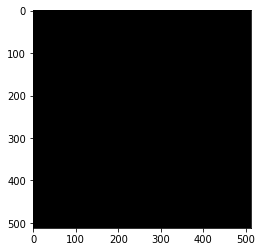

In [43]:
plt.imshow(output_image1,cmap='gray')

3 ədəd rəng kanalını dəyişdiyimiz rəsm ölçüsünə uyğun rəsm hazırlayıb matriks dəyərlərini 0-ilə doldururuq.filter tətbiq olunduqdan sonra bu dəyərlər dəyişəcəkdir

We change the 3 color channels to create a picture according to the size of the picture and filling the matrix values with 0. These values will change after the filter is applied

Filter tətbiq olunduğundan rəsm kanallarında 0-255 kanal sayı kəskin dəyişə bildiyindən,kanal sayını tənzimləməliyikki,hər pikseldə rəng aralığı kəskin fərqlənməsin

As the filter applied, the number of channels 0-255 can be changed dramatically, we should clean channel numbers, we must make sure that the color space in each pixel does not vary sharply

In [44]:
def pixels(arr):
    """

    Values that are more than 255

    """
    # Creating an empty array
    empty = np.empty(arr.shape)
    # Filling array with 255 value for all elements
    empty.fill(255)
    # has to be less than appropriate element in 'empty'
    result = np.where(arr < empty, arr, empty)
    return result

Əgər rəsm rəng kanalında 255 dəyərini keçən rəqəm varsa,həmin rəqəmləri 255 ilə əvəzləyirik.Zatən 255-i keçmiş rəng kanalı o rəng aralığının maksimum dəyəri olduğunu bilirik.Biz bunu sabit dəyər əldə etməyimiz üçün hazırlayırıq

If the image color channel has a value that exceeds 255, then replace those numbers with 255. We already know that the previous 255 color channel is the maximum value of that color range. We're preparing this for a fixed value 

Və nəhayət kerneli rəsmlər üzərinə tətbiq edək

And fortunately, apply kernel to pictures

In [45]:
for i in range(image_pad.shape[0]-4): # rəsm üzərinə (2,2) padding əlavə etmişdik
    for j in range(image_pad.shape[1]-4):
        input_image = image_pad[i:i+3, j:j+3]
        output_image1[i,j] = np.sum(input_image*kernel_1)
        output_image2[i,j] = np.sum(input_image*kernel_2)
        output_image3[i, j] = np.sum(input_image * kernel_3)



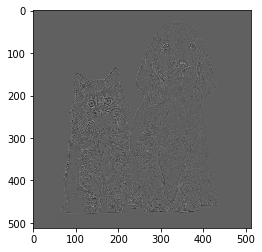

In [49]:
plt.imshow(output_image3,cmap='gray')

Filter tətbiq olunmuş rəsmimizi aktiv funksiyalardan birindən keçirək.Səbəbi isə rəsmlər qarışıq sistemə malik gürültülü obyekt olduğu üçün daxilində əldə etdiyimiz siqnalları aktiv etməmiz şərtdir.Əldə etdiyimiz rəsm xətti funksiya olub polinom davranacaqdır.Rəsm ,videolar daha qarmaqarışıq (rəng çalarlarının anidən düşüb qalxması) gürültüdən ibarət olduğu üçün linear regression -  deyil

https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0

Let us pass the filter function to one of the active functions. The reason is that the paintings are a rhythmic object with a complex system. We need to activate the signals we get inside. is not linear regression

Activation function 

Biz bu bəhsdə relu funksiyasından istifadə edəcəyik.

We should use Relu function on this

In [50]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def relu(x):
    return np.maximum(0.0,x)
def softmax(x):
    expo = np.exp(x)
    expo_sum = np.sum(np.exp(x))
    return expo/expo_sum

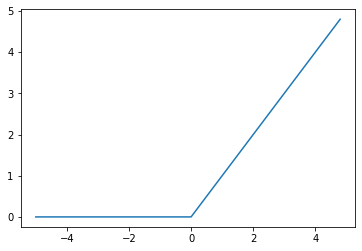

In [53]:
def relu(x):
    return 0 if x <= 0 else x
plt.plot(np.arange(-5, 5, 0.2), [relu(x) for x in np.arange(-5, 5, 0.2)])
plt.axis()
pass

Və filter tətbiq etdiyimiz rəsmlərin həm piksel dəyərlərini sabit tutaq həm də relu funksiyasından keçirək

And let's keep the pixel values of the images we apply to the filter and the apply relu function

In [51]:
output_image1 = pixels(relu(output_image1))
output_image2 = pixels(relu(output_image2))
output_image3 = pixels(relu(output_image3))

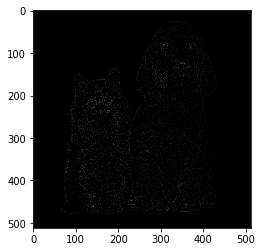

In [52]:
plt.imshow(output_image3,cmap='gray')

aktiv funksiyadan öncəki rəsmlə relu istifadə etdiyimiz rəsmin son nəticəsi arasında fərqi yəqinki görürsünüz.

Probably you can see the difference between picture previously applied active function and picture relu applied.

In [56]:
def Conv():
    """
    """
    f, axarr = plt.subplots(2, 2, figsize=(10, 10))
    #plt.set_cmap('gray')
    f.suptitle('Kernel 3x3', fontsize=16)
    axarr[0, 0].imshow(original('data/catdog.jpg'))
    axarr[0,0].set_ylabel('Original image')
    #
    axarr[0, 1].imshow(output_image1)

    #
    axarr[1, 0].imshow(output_image2)

    #
    axarr[1, 1].imshow(output_image3)

    plt.show()



Image shape: (512, 512, 3)


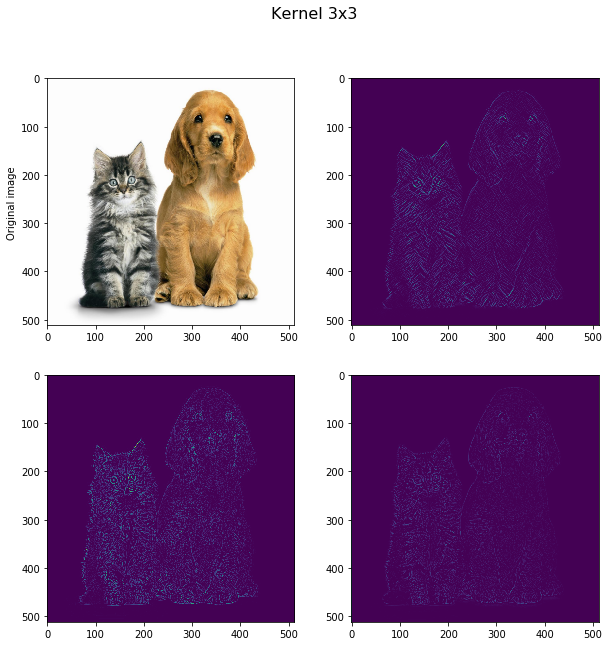

In [57]:
Conv()

Rəsmdə obyektləri nəzərə çarpaçaq dərəcədə göstərmək üçün son illərin aktual mövzusu olan dərin öyrənmə metodu ilə tətbiq edə bilərik.Bu bəhsdə filterlərin tətbiqi aktiv funksiyalardan keçirilməsini göstərməyə çalışdım.Yaxın zamanda bu kodlara əlavə olaraq əldə etdiyimiz nəticələri süni sinir şəbəkələrini numpy kitabxanası ilə hazırlayaraq dərin öyrənəcəyik.

To show objects distinctly using the deep learning which is the actively using for last years. In this subject I have tried to show how to apply functions , passing through active functions. In the near future, we will gain in-depth knowledge of the results we have obtained in addition to these codes by developing an artificial neural network with a numpy library